<a href="https://colab.research.google.com/github/LuizWalker/PIM---Processamento-de-Imagens-Medicas/blob/main/PIM_Mestrado_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE 2**

##LEANDRO GONÇALVES
##LUIZ WALKER

#Importação de bibliotecas e imagens

In [ ]:
# Acessando Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import copy
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


#Carregando imagens

path_img1_small = '/content/drive/MyDrive/PDI/Jardim_Simples_640_427.jpg'
path_img1_big = '/content/drive/MyDrive/PDI/Jardim_Simples_1280_853.jpg'


path_img2_small = '/content/drive/MyDrive/PDI/Hamburguer_640_427.jpg'
path_img2_big = '/content/drive/MyDrive/PDI/Hamburguer_1280_853.jpg'


path_img3_small = '/content/drive/MyDrive/PDI/Xícara_Café_640_959.jpg'
path_img3_big = '/content/drive/MyDrive/PDI/Xícara_Café_1280_1917.jpg'


path_img4_small = '/content/drive/MyDrive/PDI/Parede_Vaso640960.jpg'
path_img4_big = '/content/drive/MyDrive/PDI/Parede_Vaso12801920.jpg'

#Leitura imagens:

img_matrix1_small = cv2.imread(path_img1_small)
img_matrix2_small = cv2.imread(path_img2_small)
img_matrix3_small = cv2.imread(path_img3_small)
img_matrix4_small = cv2.imread(path_img4_small)
#cv2_imshow(img_matrix4_small)
print("\n\n\n")

img_matrix1_big = cv2.imread(path_img1_big)
img_matrix2_big = cv2.imread(path_img2_big)
img_matrix3_big = cv2.imread(path_img3_big)
img_matrix4_big = cv2.imread(path_img4_big)
#cv2_imshow(img_matrix4_big)
print("\n\n\n")

#cv2_imshow(img_matrix3_big)

#img_matrix2 = cv2.imread(path_img2)
#img_matrix3 = cv2.imread(path_img3)
#img_matrix4 = cv2.imread(path_img4)


#Verificando a informação espacial das imagens

In [ ]:
#função de Informação Espacial

def Inf_spatial(img_grayscale):
    sh = cv2.Sobel (img_grayscale, cv2.CV_64F , 1, 0, ksize =1)
    sv = cv2.Sobel (img_grayscale , cv2.CV_64F , 0, 1, ksize =1)

    #SIr = np.sqrt (sh **2 + sv **2)
    SIr = np.sqrt(np.square(sh) + np.square(sv))

    SI_mean = np.sum(SIr ) / (SIr. shape [0] * SIr . shape [1])
    SI_rms = np.sqrt (np.sum (SIr **2) / (SIr. shape [0] * SIr . shape [1]) )
    SI_stdev = np.sqrt (np.sum(SIr **2 - SI_mean **2) / (SIr. shape [0] *SIr. shape [1]) )

    return SI_stdev

In [ ]:
#Para a imagem 1:
#img_matrix_small_gray = cv2.imread(path_img1_small, 0)

#img_matrix_big_gray = cv2.imread(path_img1_big, 0)

#Para a imagem 2:
#img_matrix_small_gray = cv2.imread(path_img2_small, 0)

#img_matrix_big_gray = cv2.imread(path_img2_big, 0)

#Para a imagem 3:
#img_matrix_small_gray = cv2.imread(path_img3_small, 0)

#img_matrix_big_gray = cv2.imread(path_img3_big, 0)

#Para a imagem 4:
img_matrix_small_gray = cv2.imread(path_img4_small, 0)

img_matrix_big_gray = cv2.imread(path_img4_big, 0)

In [ ]:
info_espacial_img_small = Inf_spatial(img_matrix_small_gray)
print("Informação Espacial da imagem de menor resolução: ", info_espacial_img_small)

info_espacial_img_big = Inf_spatial(img_matrix_big_gray)
print("Informação Espacial da imagem de maior resolução: ", info_espacial_img_big)



Informação Espacial da imagem de menor resolução:  2.4550832160838727
Informação Espacial da imagem de maior resolução:  1.8113531810099854


#Interpolação das imagens

##Menor Resolução -> Maior Resolução

In [ ]:
#img_original_grey = img_matrix_big_gray
#cv2_imshow(img_original_grey)
#print(img_original_grey.shape)

#Para a imagem 2

img_original_grey = img_matrix_big_gray
#cv2_imshow(img_original_grey)
print(img_original_grey.shape)

(1920, 1280)


In [ ]:
#img_test_grey = img_matrix_small_gray
#cv2_imshow(img_test_grey)
#print(img_test_grey.shape)

#Para a imagem 2

img_test_grey = img_matrix_small_gray
#cv2_imshow(img_test_grey)
print(img_test_grey.shape)



(960, 640)


###Métodos de Interpolação do OpenCV: nearest neighbor interpolation, bilinear interpolation, bicubic interpolation.

In [ ]:
#Definindo as dimensões da imagem a ser modificada

new_widht = img_original_grey.shape[1]

new_height = img_original_grey.shape[0]

#Interpolação por vizinho mais próximo

#img_test_grey_resized = cv2.resize(img_test_grey, (new_widht, new_height), interpolation=cv2.INTER_NEAREST)

#Interpolação bilinear

#img_test_grey_resized = cv2.resize(img_test_grey, (new_widht, new_height), interpolation=cv2.INTER_LINEAR)

#Interpolação bicúbica

img_test_grey_resized = cv2.resize(img_test_grey, (new_widht, new_height), interpolation=cv2.INTER_CUBIC)

#cv2_imshow(img_test_grey_resized)

print(img_test_grey_resized.shape)

(1920, 1280)


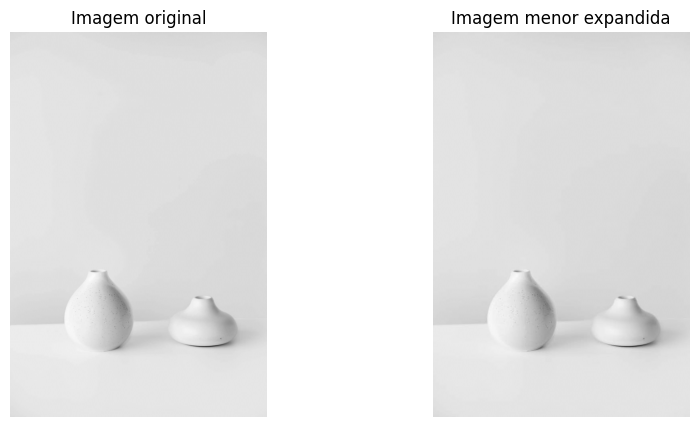

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_test_grey_resized, cmap='gray')
plt.title("Imagem menor expandida")
plt.axis("off")

plt.show()

In [ ]:
#Métricas objetivas de comparação entre imagens

from skimage.metrics import structural_similarity as ssim

SSIM_rate = ssim(img_original_grey,img_test_grey_resized)
print("Taxa de proximidade entre as imagens(SSIM): ", SSIM_rate)

#Para a imagem 1 :

#Para a interpolação por vizinho mais próximo -> SSIM = 92,18%
#Para a interpolação bilinear -> SSIM = 95,87%
#Para a interpolação bicúbica -> SSIM = 95,40%

#Para a imagem 2:

#Para a interpolação por vizinho mais próximo -> SSIM = 92,36 %
#Para a interpolação bilinear -> SSIM = 94,90 %
#Para a interpolação bicúbica -> SSIM = 95,08 %

#Para a imagem 3:

#Para a interpolação por vizinho mais próximo -> SSIM = 97,40%
#Para a interpolação bilinear -> SSIM = 98,27%
#Para a interpolação bicúbica -> SSIM = 98,12%

#Para a imagem 4:

#Para a interpolação por vizinho mais próximo -> SSIM = 99,57%
#Para a interpolação bilinear -> SSIM = 99,62%
#Para a interpolação bicúbica -> SSIM = 99,60%

PSNR_rate = cv2.PSNR(img_original_grey,img_test_grey_resized)
print("Taxa de proximidade entre as imagens(PSNR): ", PSNR_rate)

#Para a imagem 1 :

#Para a interpolação por vizinho mais próximo -> PSNR = 30,93dB
#Para a interpolação bilinear -> PSNR = 35,73dB
#Para a interpolação bicúbica -> PSNR = 35,96dB

#Para a imagem 2 :

#Para a interpolação por vizinho mais próximo -> PSNR = 31,71 dB
#Para a interpolação bilinear -> PSNR = 34,89 dB
#Para a interpolação bicúbica -> PSNR = 35,09

#Para a imagem 3:

#Para a interpolação por vizinho mais próximo -> PSNR = 38,60 dB
#Para a interpolação bilinear -> PSNR = 43,11 dB
#Para a interpolação bicúbica -> PSNR = 42,91 dB

#Para a imagem 4:

#Para a interpolação por vizinho mais próximo -> PSNR = 49,18 dB
#Para a interpolação bilinear -> PSNR = 49,91 dB
#Para a interpolação bicúbica -> PSNR = 50,01 dB

Taxa de proximidade entre as imagens(SSIM):  0.9960319755267356
Taxa de proximidade entre as imagens(PSNR):  50.010127962655744


##Maior Resolução -> Menor Resolução

In [ ]:
img_original_grey_big_to_small = img_matrix_small_gray
#cv2_imshow(img_original_grey)
print(img_original_grey_big_to_small.shape)

(960, 640)


In [ ]:
img_test_grey_big_to_small = img_matrix_big_gray
#cv2_imshow(img_test_grey)
print(img_test_grey_big_to_small.shape)

(1920, 1280)


###Métodos de Interpolação do OpenCV: nearest neighbor interpolation, bilinear interpolation, bicubic interpolation.

In [ ]:
#Definindo as dimensões da imagem a ser modificada

new_widht_big_to_small = img_original_grey_big_to_small.shape[1]

new_height_big_to_small = img_original_grey_big_to_small.shape[0]

#Interpolação por vizinho mais próximo

#img_test_grey_big_to_small_resized = cv2.resize(img_test_grey_big_to_small, (new_widht_big_to_small,new_height_big_to_small), interpolation=cv2.INTER_NEAREST)

#Interpolação bilinear

#img_test_grey_big_to_small_resized = cv2.resize(img_test_grey_big_to_small, (new_widht_big_to_small,new_height_big_to_small), interpolation=cv2.INTER_LINEAR)

#Interpolação bicúbica

img_test_grey_big_to_small_resized = cv2.resize(img_test_grey_big_to_small, (new_widht_big_to_small,new_height_big_to_small), interpolation=cv2.INTER_CUBIC)

#cv2_imshow(img_test_grey_resized)

print(img_test_grey_big_to_small_resized.shape)

(960, 640)


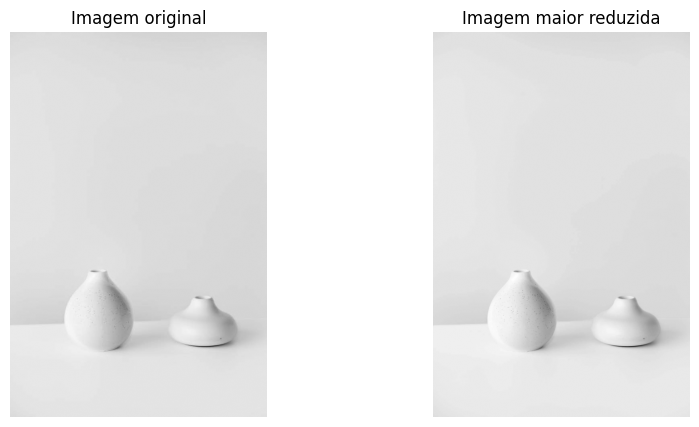

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey_big_to_small, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_test_grey_big_to_small_resized, cmap='gray')
plt.title("Imagem maior reduzida")
plt.axis("off")

plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim

SSIM_rate_reduction = ssim(img_original_grey_big_to_small, img_test_grey_big_to_small_resized)
print("Taxa de proximidade entre as imagens(SSIM): ", SSIM_rate_reduction)

#Para a imagem 1:
#Para a interpolação por vizinho mais próximo -> SSIM = 96,49%
#Para a interpolação bilinear -> SSIM = 97,40%
#Para a interpolação bicúbica -> SSIM = 97,04%

#Para a imagem 2:
#Para a interpolação por vizinho mais próximo -> SSIM = 93,83%
#Para a interpolação bilinear -> SSIM = 97,04%
#Para a interpolação bicúbica -> SSIM = 96,67%

#Para a imagem 3:
#Para a interpolação por vizinho mais próximo -> SSIM = 98,03%
#Para a interpolação bilinear -> SSIM = 98,48%
#Para a interpolação bicúbica -> SSIM = 98,30%

#Para a imagem 4:
#Para a interpolação por vizinho mais próximo -> SSIM = 99,51%
#Para a interpolação bilinear -> SSIM = 99,60%
#Para a interpolação bicúbica -> SSIM = 99,51%

PSNR_rate_reduction = cv2.PSNR(img_original_grey_big_to_small, img_test_grey_big_to_small_resized)
print("Taxa de proximidade entre as imagens(PSNR): ", PSNR_rate_reduction)

#Para a interpolação por vizinho mais próximo -> PSNR = 33,91dB
#Para a interpolação bilinear -> PSNR = 36,80dB
#Para a interpolação bicúbica -> PSNR = 35,98dB

#Para a imagem 2:
#Para a interpolação por vizinho mais próximo -> PSNR = 31,60 dB
#Para a interpolação bilinear -> PSNR = 36,01 dB
#Para a interpolação bicúbica -> PSNR = 35,25 dB

#Para a imagem 3:
#Para a interpolação por vizinho mais próximo -> PSNR = 40,42 dB
#Para a interpolação bilinear -> PSNR = 43,31 dB
#Para a interpolação bicúbica -> PSNR = 42,89 dB

#Para a imagem 4:
#Para a interpolação por vizinho mais próximo -> PSNR = 49,24 dB
#Para a interpolação bilinear -> PSNR = 50,89 dB
#Para a interpolação bicúbica -> PSNR = 49,98 dB

Taxa de proximidade entre as imagens(SSIM):  0.9951087405452793
Taxa de proximidade entre as imagens(PSNR):  49.977313753394974


**Etapa 1 - Teste de efeito janela de redução**